In [1]:
import regex
import re
import pandas as pd
import numpy as np
import emoji
from collections import Counter
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
def startsWithDateAndTime(s):
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+)[ ]?(AM|PM|am|pm)? -' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

In [3]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [4]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message

In [5]:
#f = open("demofile.txt", "r")

data = [] # List to keep track of data so it can be used by a Pandas dataframe
parsedData = []
conversation = "data/chat.txt"
with open(conversation, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [6]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])
df['Time'] = pd.to_datetime(df['Time'], format = '%I:%M %p')
df["Day"]= pd.to_datetime(df['Date']).dt.day_name()
df.tail(20)

Date                Time            Author  \
12096 2020-03-11 1900-01-01 17:24:00  Prakhar Tripathi   
12097 2020-03-11 1900-01-01 17:25:00           Smarika   
12098 2020-03-11 1900-01-01 17:25:00  Prakhar Tripathi   
12099 2020-03-11 1900-01-01 17:25:00  Prakhar Tripathi   
12100 2020-03-11 1900-01-01 17:26:00         Subhankar   
12101 2020-03-11 1900-01-01 17:26:00         Subhankar   
12102 2020-03-11 1900-01-01 17:26:00  Prakhar Tripathi   
12103 2020-03-11 1900-01-01 17:26:00         Subhankar   
12104 2020-03-11 1900-01-01 17:26:00         Subhankar   
12105 2020-03-11 1900-01-01 17:27:00  Prakhar Tripathi   
12106 2020-03-11 1900-01-01 17:28:00  Prakhar Tripathi   
12107 2020-03-11 1900-01-01 17:28:00  Prakhar Tripathi   
12108 2020-03-11 1900-01-01 17:28:00         Subhankar   
12109 2020-03-11 1900-01-01 17:28:00         Subhankar   
12110 2020-03-11 1900-01-01 17:30:00              Aman   
12111 2020-03-11 1900-01-01 17:30:00              Aman   
12112 2020-03-11 1900-01-01 17:30:00         Subhankar   
12113 2020-03-11 1900-01-01 17:31:00              Aman   
12114 2020-03-11 1900-01-01 17:36:00              None   
12115 2020-03-11 1900-01-01 17:36:00             ~/nil   

                                                 Message        Day  
12096                        Hurting Hindu sentiments! 🤭  Wednesday  
12097                                           Oh my my  Wednesday  
12098                                    <Media omitted>  Wednesday  
12099          And complaint Karne wala hai ... BJP MLA!  Wednesday  
12100                                     Haan Dekh liya  Wednesday  
12101                                    Wphoooo awesome  Wednesday  
12102                                              😂🤦‍♂️  Wednesday  
12103                                    <Media omitted>  Wednesday  
12104                                    <Media omitted>  Wednesday  
12105                                         Logic 101🔥  Wednesday  
12106                        "Hindu khatre main hai bro"  Wednesday  
12107                                    <Media omitted>  Wednesday  
12108                                    Haan wo toh hai  Wednesday  
12109  Sadhvi Pragya nei toh cancer theek liya hai kh...  Wednesday  
12110  I guess we should stop the mockery of our reli...  Wednesday  
12111                      Hindu khatre me h, it is true  Wednesday  
12112                                            Yes yes  Wednesday  
12113  Its very important for us to accept hindusim a...  Wednesday  
12114  ~/nil: https://www.deccanherald.com/national/i...  Wednesday  
12115                      Ye gandagi kahi toh kaam aayi  Wednesday

In [7]:
total_messages = len(df)

In [8]:
total_messages

12116

In [9]:
df['Author'] = df['Author'].replace(['Prateek Baruah','Aarif Md.','Jai_SMIT','Abdul SMIT','Agamya Jha',
                                     'Utkarsh Kesarvani','~/nil','Prakhar Tripathi'],
                                    ['Prateek','Aarif','Jai','Abdul','Agamya','Utkarsh','Niladri','Prakhar'])

In [10]:
unique_names = [x for x in df.Author.unique()]

In [11]:
for i in [None,'+91 96342 24579']:
    unique_names.remove(i)

In [12]:
unique_names

['Prateek',
 'Gurjot',
 'Aarif',
 'Jai',
 'Smarika',
 'Abdul',
 'Agamya',
 'Utkarsh',
 'Subhankar',
 'Sarthak',
 'Niladri',
 'Aman',
 'Prakhar']

In [13]:
media_messages = df[df['Message'] == '<Media omitted>'].shape[0]
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)
emojis = sum(df['emoji'].str.len())
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)
print("Chat Details : ")
print("Messages:",total_messages)
print("Media:",media_messages)
print("Emojis:",emojis)
print("Links:",links)

Chat Details : 
Messages: 12116
Media: 1326
Emojis: 6586
Links: 338


In [14]:
data = {'author': [],'msg_sent':  [],'words_per_msg': [],'media_msg': [],'emoji_sent': [],'links_sent': [],
        'early_morning_msg': [],'morning_msg': [],'noon_msg': [],'evening_msg': [],'night_msg': [],'sunday': [],
        'monday': [],'tuesday': [],'wednesday': [],'thursday': [],'friday': [],'saturday': []}
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = unique_names
for i in range(len(l)):
    
    # Filtering out messages of particular user
    req_df= messages_df[messages_df["Author"] == l[i]]
    data['author'].append(l[i])
    # req_df will contain messages of only one particular user
    
    # shape will print number of rows which indirectly means the number of messages
    data['msg_sent'].append(req_df.shape[0])
    
    #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
    words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
    data['words_per_msg'].append(words_per_message)
    
    #media conists of media messages
    media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
    data['media_msg'].append(media)
    
    # emojis conists of total emojis
    emojis = sum(req_df['emoji'].str.len())
    data['emoji_sent'].append(emojis)
    
    #links consist of total links
    links = sum(req_df["urlcount"])   
    data['links_sent'].append(links)
    
    data['early_morning_msg'].append(len(df[(df.Author == unique_names[i]) & (df.Time.dt.hour >= 0) & (df.Time.dt.hour < 7)]))
    data['morning_msg'].append(len(df[(df.Author == unique_names[i]) & (df.Time.dt.hour >= 7) & (df.Time.dt.hour < 12)]))
    data['noon_msg'].append(len(df[(df.Author == unique_names[i]) & (df.Time.dt.hour >= 12) & (df.Time.dt.hour < 15)]))
    data['evening_msg'].append(len(df[(df.Author == unique_names[i]) & (df.Time.dt.hour >= 17) & (df.Time.dt.hour < 19)]))
    data['night_msg'].append(len(df[(df.Author == unique_names[i]) & (df.Time.dt.hour >= 19) & (df.Time.dt.hour < 24)]))
    
    data['sunday'].append(len(df[(df.Author == unique_names[i]) & (df.Day == 'Sunday')]))
    data['monday'].append(len(df[(df.Author == unique_names[i]) & (df.Day == 'Monday')]))
    data['tuesday'].append(len(df[(df.Author == unique_names[i]) & (df.Day == 'Tuesday')]))
    data['wednesday'].append(len(df[(df.Author == unique_names[i]) & (df.Day == 'Wednesday')]))
    data['thursday'].append(len(df[(df.Author == unique_names[i]) & (df.Day == 'Thursday')]))
    data['friday'].append(len(df[(df.Author == unique_names[i]) & (df.Day == 'Friday')]))
    data['saturday'].append(len(df[(df.Author == unique_names[i]) & (df.Day == 'Saturday')]))

In [15]:
df_data = pd.DataFrame(data)

In [16]:
df_data

author  msg_sent  words_per_msg  media_msg  emoji_sent  links_sent  \
0     Prateek      1016       2.797244        116         676           2   
1      Gurjot        78       2.769231          6         100           0   
2       Aarif       992       2.723790         72         639           1   
3         Jai       426       5.002347         10         177           0   
4     Smarika       973       5.535457        372         447           6   
5       Abdul       789       5.510773         51         229           0   
6      Agamya      2063       4.659234         98        1454           4   
7     Utkarsh      1254       7.789474        169         298           3   
8   Subhankar       593       5.826307        110         487           4   
9     Sarthak       124       6.766129         37         114           2   
10    Niladri       142       6.457746         74          43           0   
11       Aman      1037       3.180328         90         669           1   
12    Prakhar       935       3.167914        121        1236           0   

    early_morning_msg  morning_msg  noon_msg  evening_msg  night_msg  sunday  \
0                  37          259       412           86        221     199   
1                   3           16        14            3         38       4   
2                  99          128       314          130        261     179   
3                  12           92       129           16         77      28   
4                  22          398       322          126        329     214   
5                  17          144       319           36        221      52   
6                 194          352       526          130        582     353   
7                  52          221       353          144        522     224   
8                  53          105       183           68        194     112   
9                  10            1        14           30         89      10   
10                 16           25        36           12         89      61   
11                 50          199       488           29        267      97   
12                 64          205       222          111        344     122   

    monday  tuesday  wednesday  thursday  friday  saturday  
0      171      235        112       130     166       119  
1       13       18         13        13      16         7  
2       77      125        166       228     161       128  
3       68       54         20        92      50       124  
4      174      244        232       122     169       190  
5       54      197         91        36     110       300  
6      148      343        359       264     256       438  
7      159      180        365       250     147        98  
8      127       91         53       147      93        80  
9       11        9         44         2      59        26  
10      25       34         28        24      31        13  
11     110      186        200       321     112       101  
12     211      232        124       139     101       127

In [17]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('🤣', 3159), ('😂', 1394), ('🤭', 249), ('👀', 208), ('😍', 103), ('🔥', 69), ('🙌', 67), ('🤦\u200d♂️', 67), ('😌', 62), ('😅', 55), ('😓', 52), ('👌', 48), ('🤦\u200d♂', 32), ('🌝', 29), ('🤔', 28), ('👍', 28), ('😏', 27), ('😎', 27), ('😁', 25), ('🥳', 24), ('😛', 23), ('😝', 23), ('🥰', 22), ('👏🏻', 22), ('🤗', 21), ('😒', 20), ('😬', 20), ('😄', 20), ('😭', 19), ('☺️', 19), ('🤘🏻', 18), ('❤️', 17), ('😃', 16), ('🤟', 16), ('🙈', 14), ('👏', 14), ('🤓', 14), ('🙆\u200d♂️', 14), ('🥺', 13), ('😞', 13), ('☺', 13), ('😚', 13), ('🤤', 13), ('😘', 12), ('🌸', 12), ('😶', 12), ('😆', 11), ('✌🏻', 10), ('☝', 10), ('✌', 10), ('🤟🏻', 9), ('😷', 9), ('🙃', 8), ('😊', 8), ('💃', 8), ('💯', 8), ('👍🏻', 8), ('👆🏻', 8), ('🙏', 8), ('🤦🏼\u200d♀️', 8), ('☝🏻', 7), ('🤘', 7), ('😐', 6), ('😋', 6), ('🙂', 6), ('🖕', 6), ('🙄', 6), ('🙏🏻', 6), ('😪', 6), ('🧐', 5), ('🤨', 5), ('✌🏼', 5), ('🙌🏻', 5), ('😦', 5), ('👌🏻', 5), ('🐐', 4), ('😱', 4), ('🤪', 4), ('🐥', 4), ('😜', 4), ('🕺🏼', 4), ('😖', 4), ('👆', 4), ('👉', 4), ('👇', 4), ('🏳️\u200d🌈', 4), ('🤦🏽\u200d♂️', 4), ('😣', 4),

There are 277921 words in all the messages.


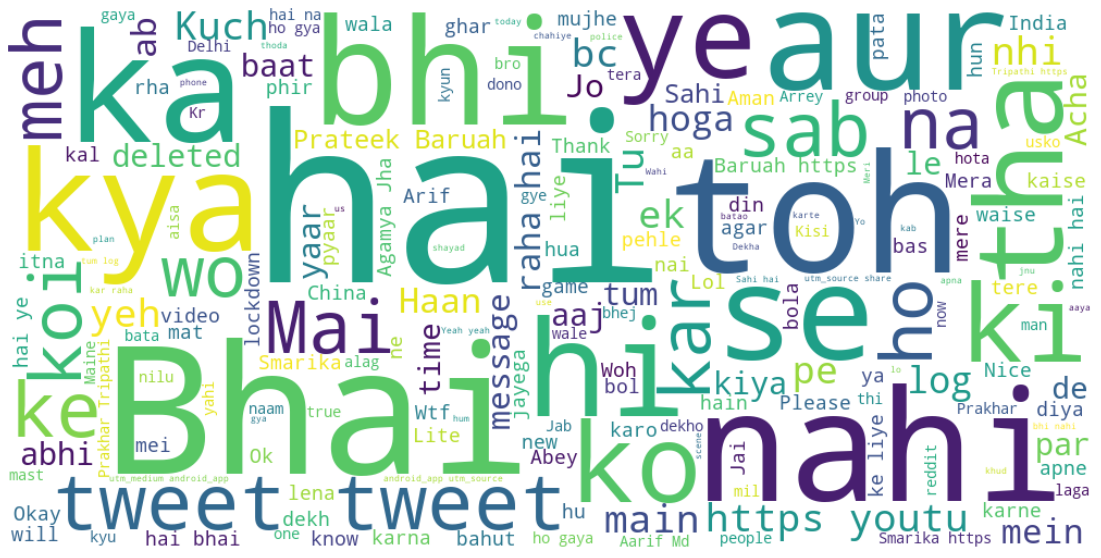

In [18]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(width=1000, height=500, stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("images/wordcloud/overall")

Author name Prateek
Author name Gurjot
Author name Aarif
Author name Jai
Author name Smarika
Author name Abdul
Author name Agamya
Author name Utkarsh
Author name Subhankar
Author name Sarthak
Author name Niladri
Author name Aman
Author name Prakhar


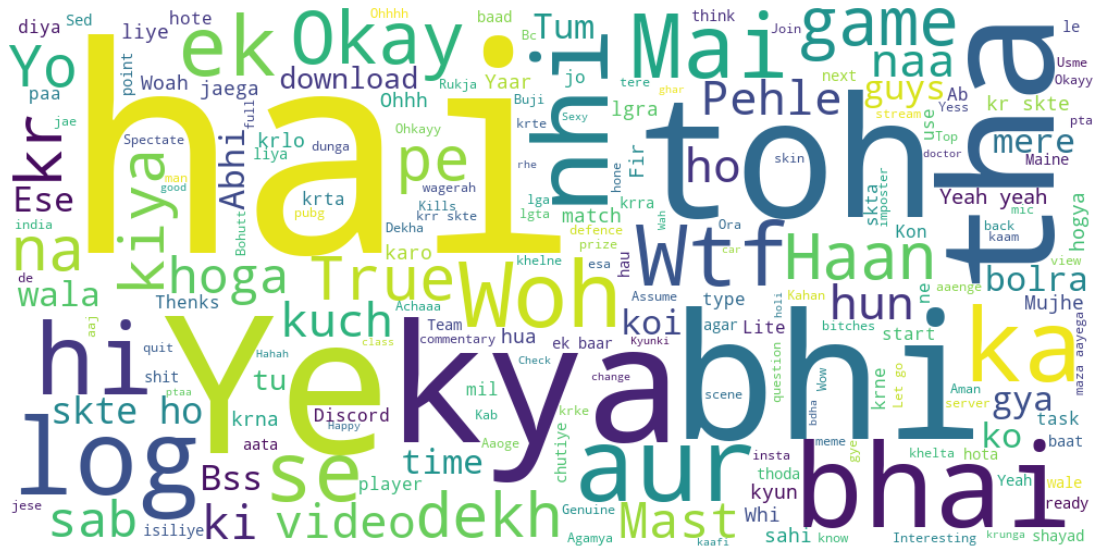

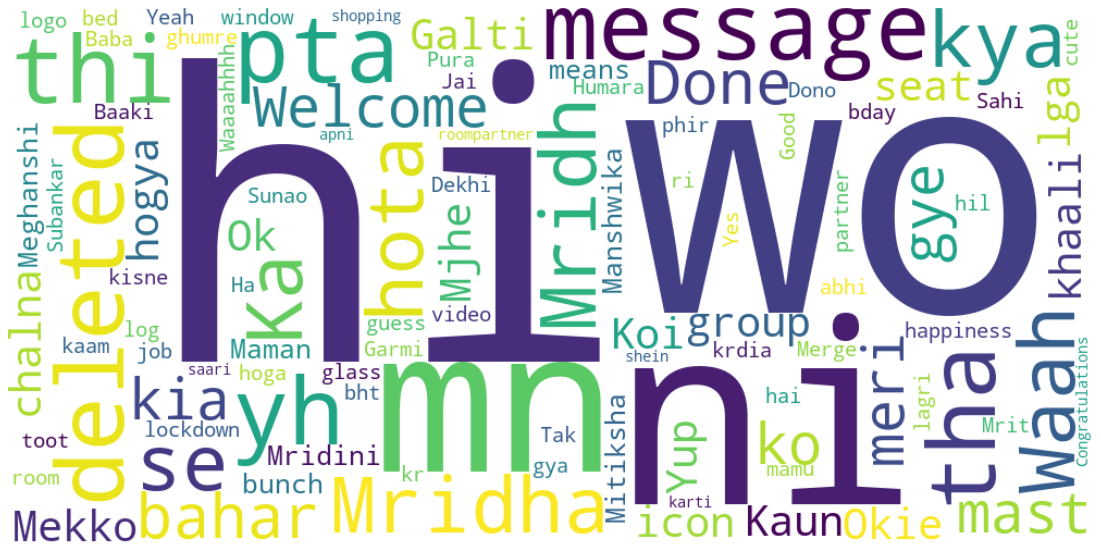

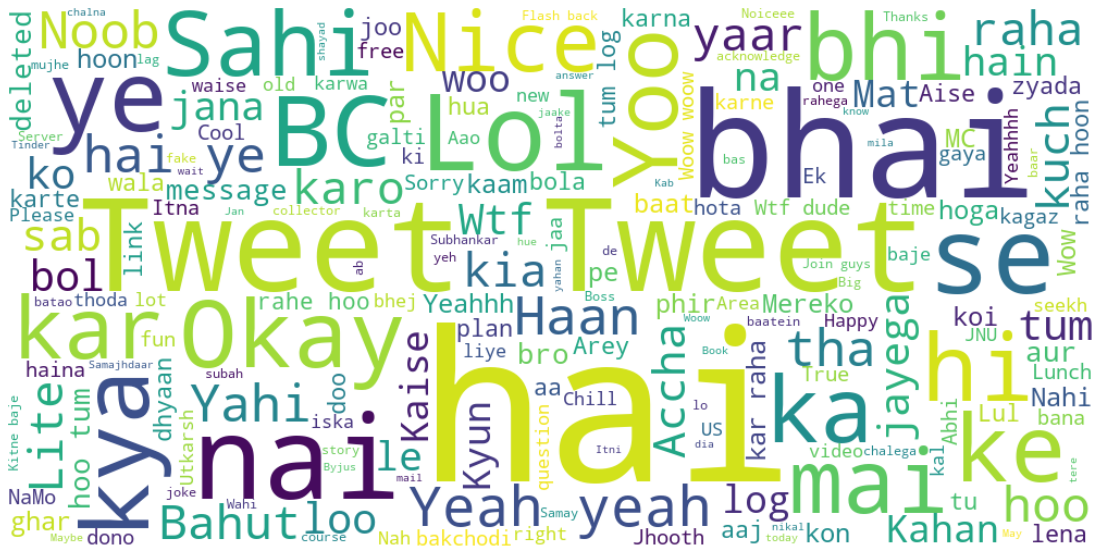

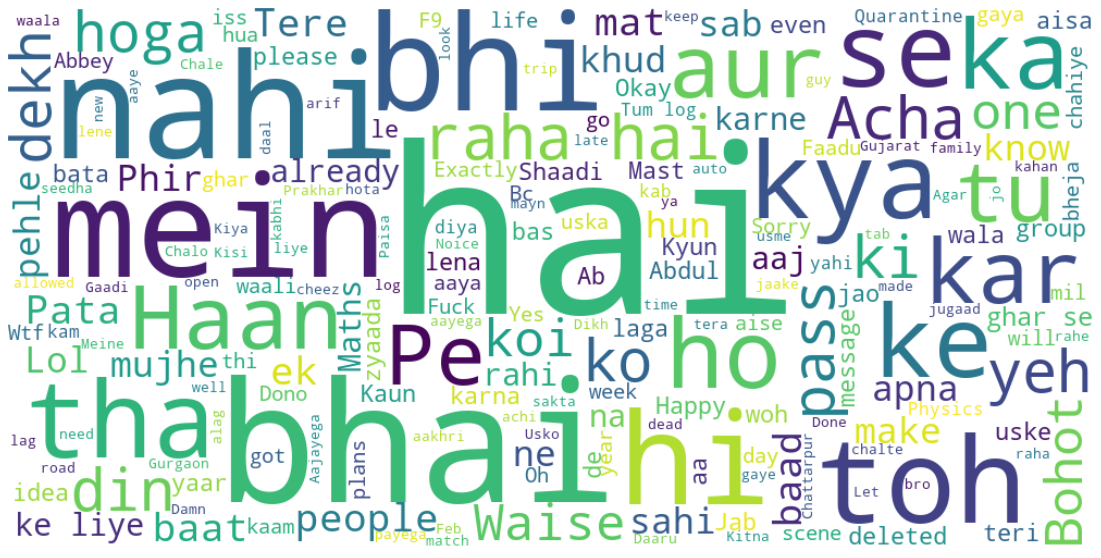

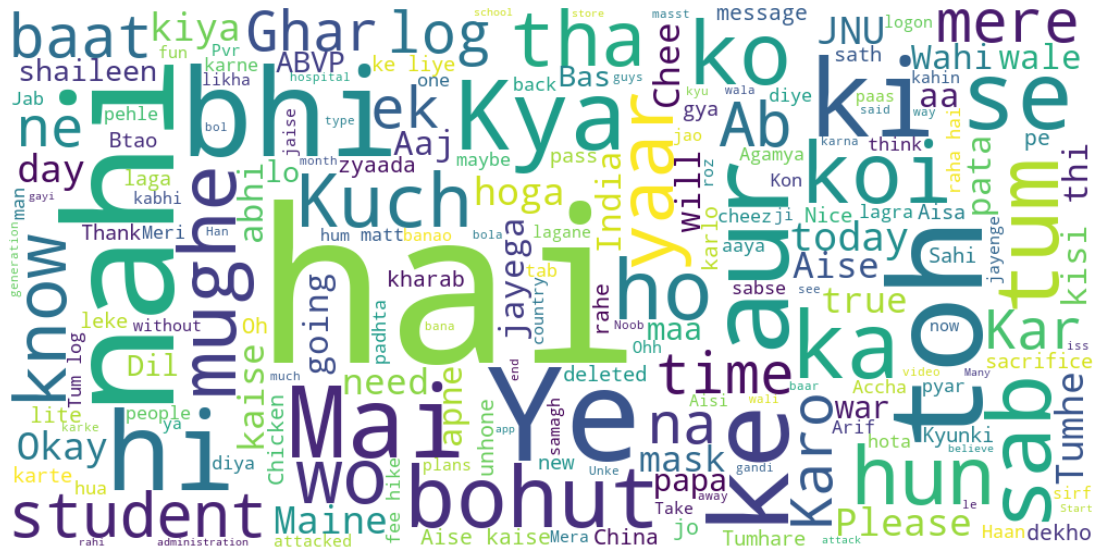

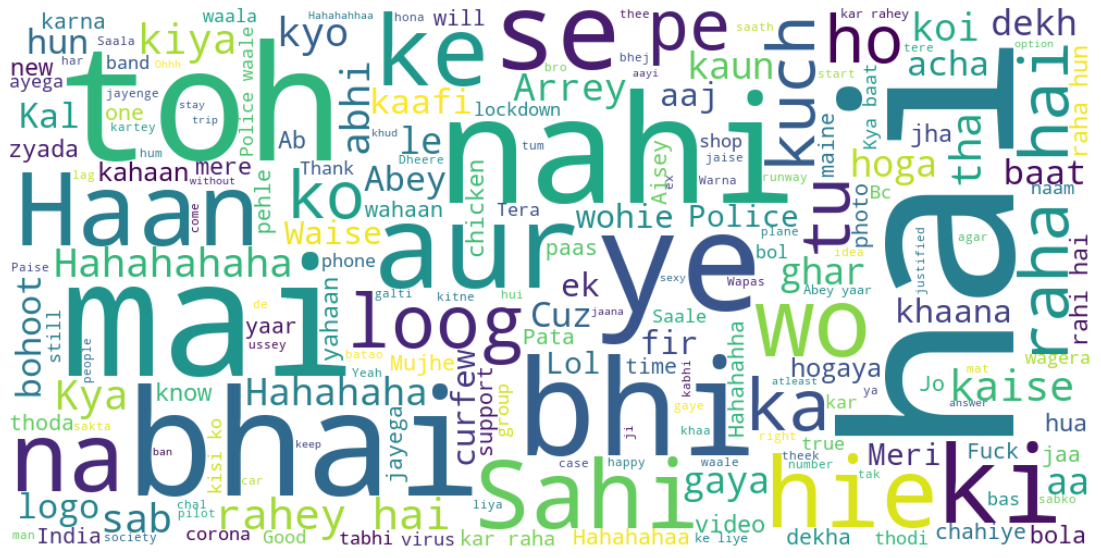

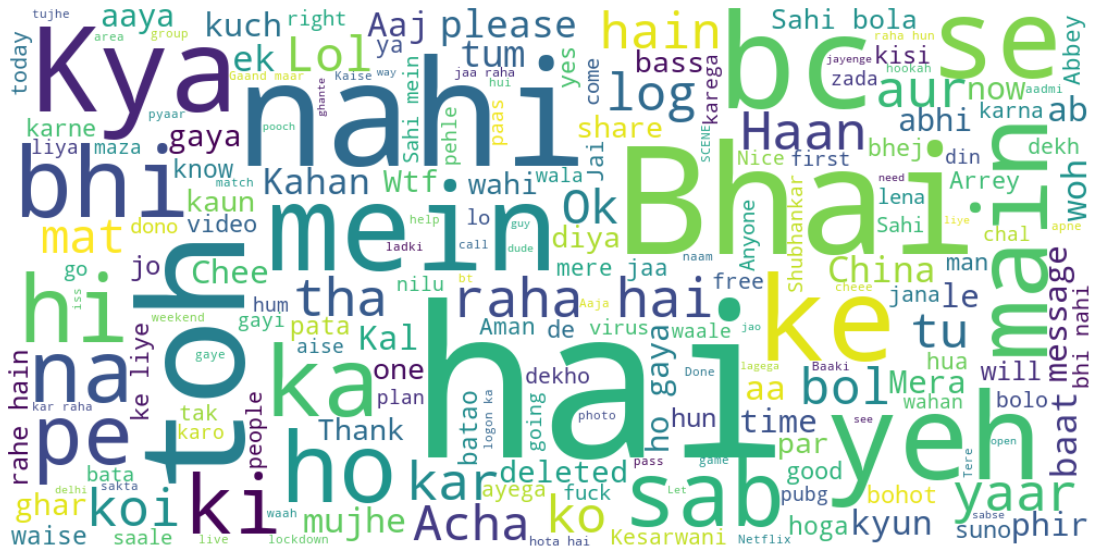

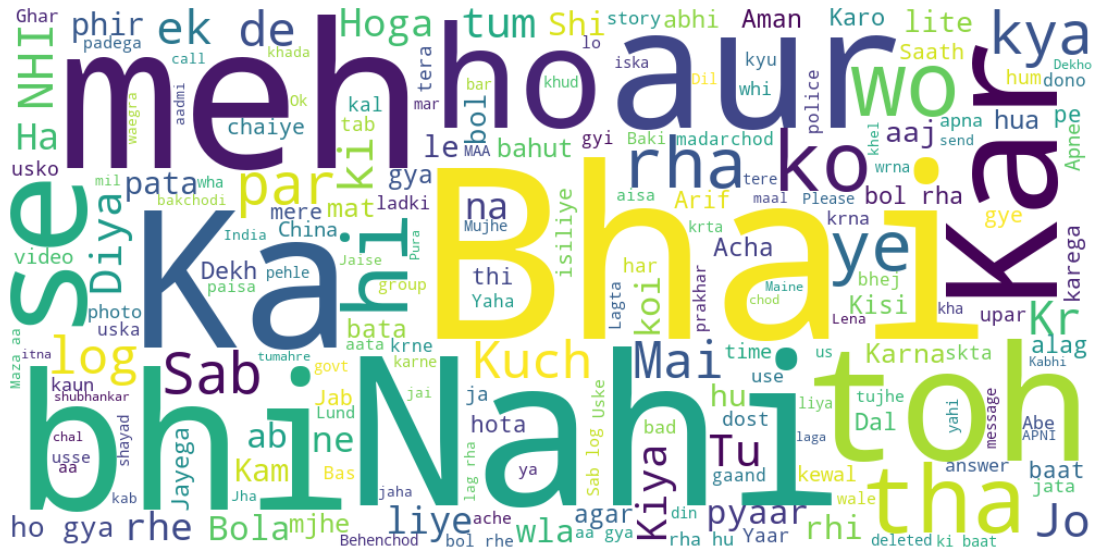

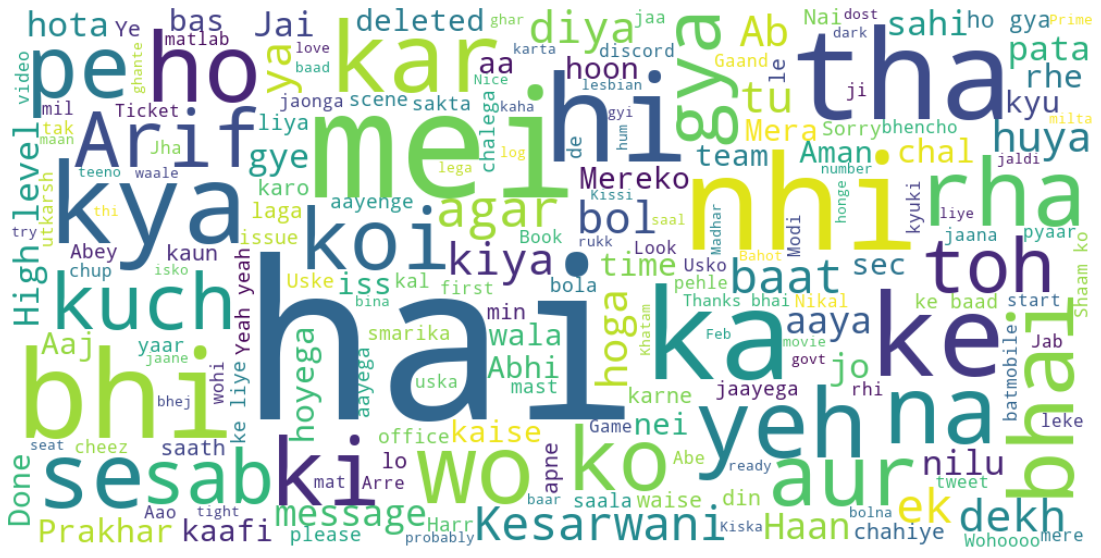

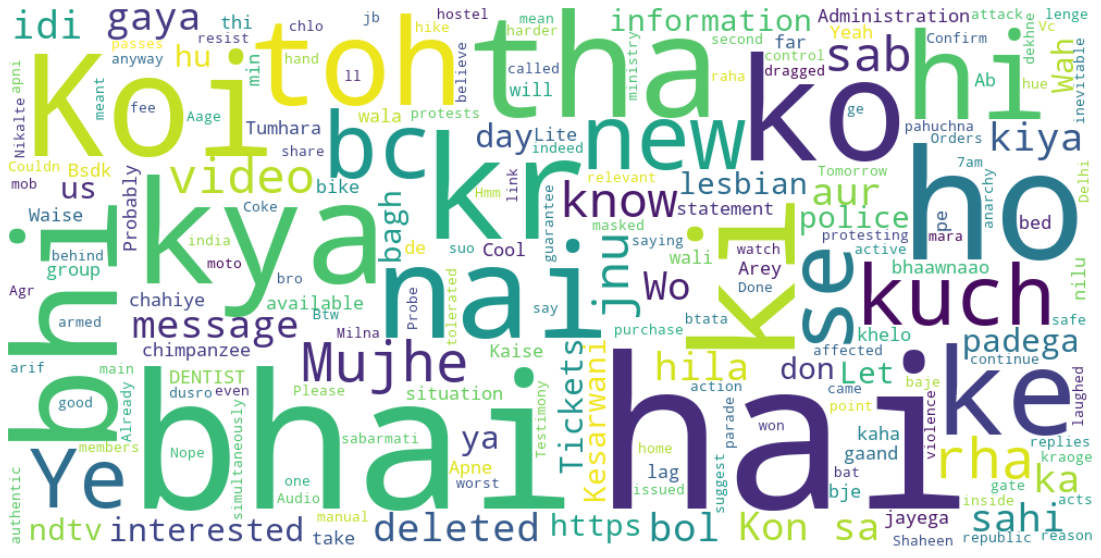

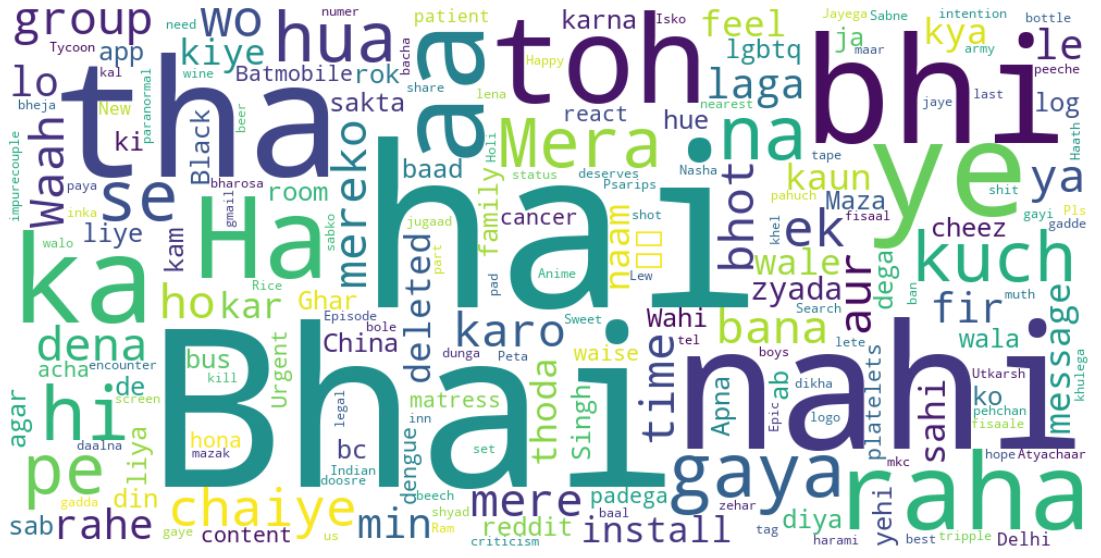

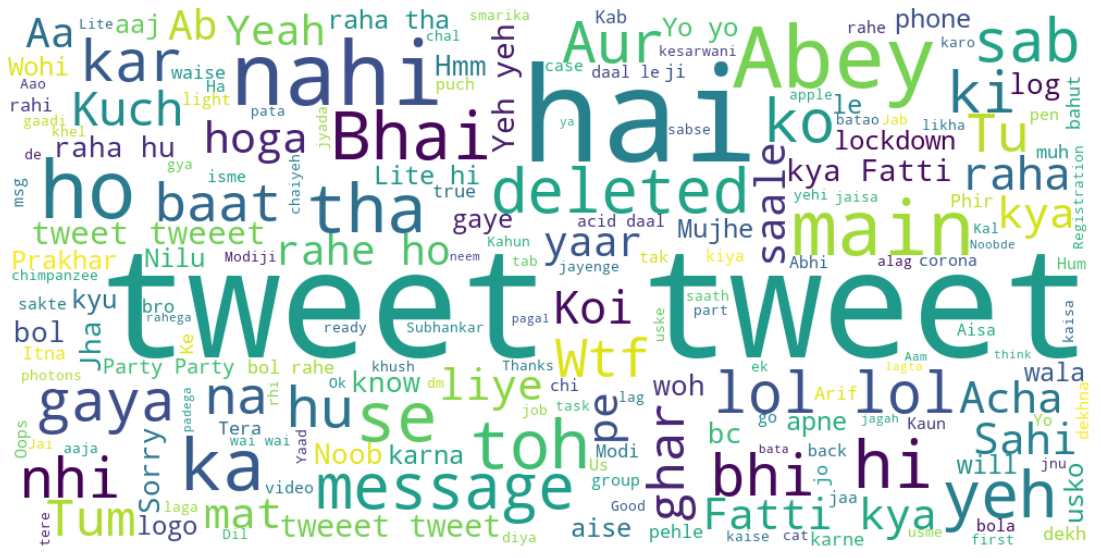

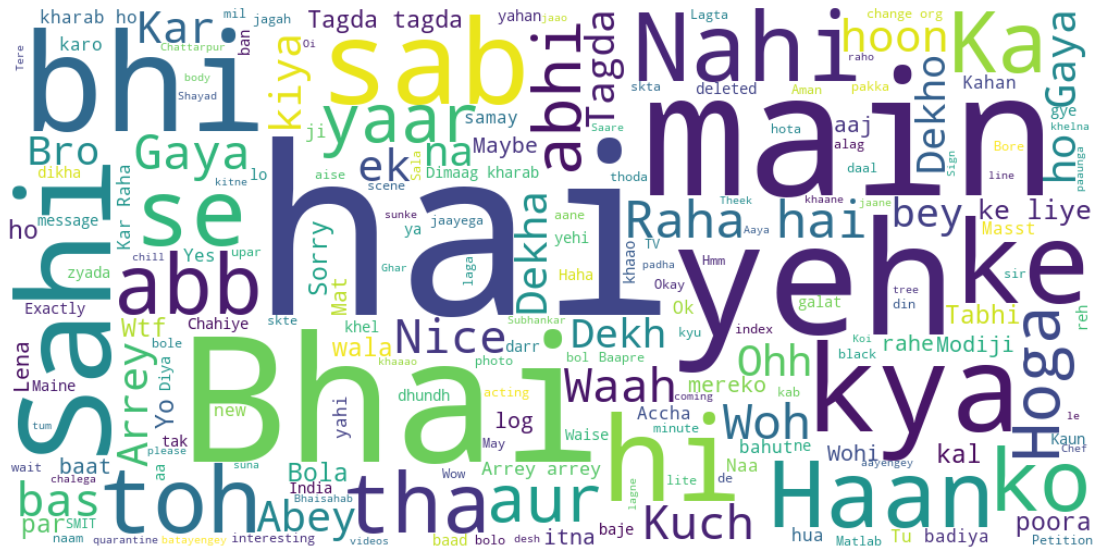

In [19]:
l = unique_names
for i in range(len(l)):
    dummy_df = messages_df[messages_df['Author'] == l[i]]
    text = " ".join(review for review in dummy_df.Message)
    stopwords = set(STOPWORDS)
    #Generate a word cloud image
    print('Author name',l[i])
    wordcloud = WordCloud(width=1000, height=500,stopwords=stopwords, background_color="white").generate(text)
    #Display the generated image   
    plt.figure( figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig("images/wordcloud/"+str(l[i]))

In [20]:
# save data sets
df.to_csv('data/base_data.csv', index=False)
df_data.to_csv('data/data.csv', index=False) 

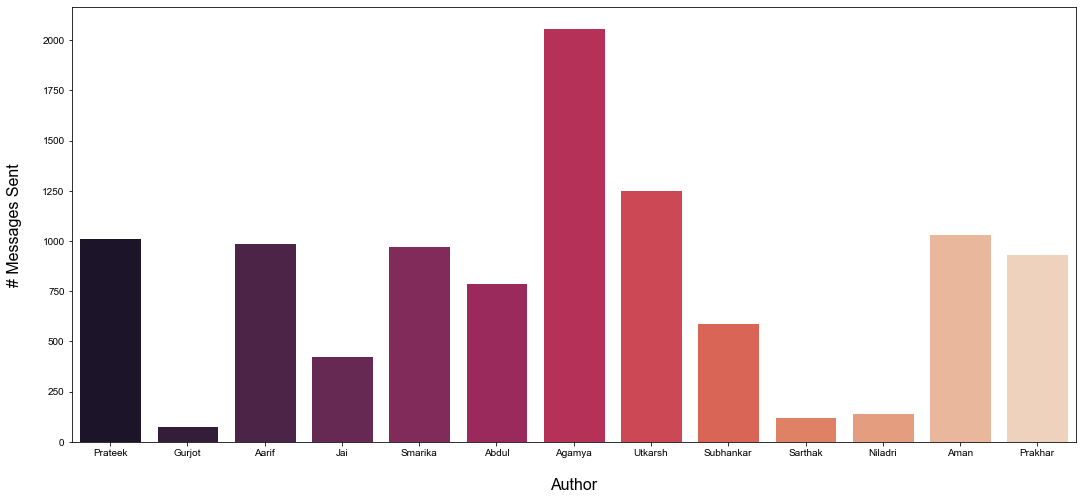

In [21]:
# bar plot -- author vs msg sent
fig, ax = plt.subplots(figsize=(18,8))
sns.set(font_scale=1.2)
sns.barplot(ax=ax ,x= df_data['author'],y=df_data['msg_sent'], palette='rocket')
plt.xlabel('Author', fontsize=16, labelpad=20)
plt.ylabel('# Messages Sent', fontsize=16, labelpad=20)
plt.savefig('images/plots/authorVSmsgSent.jpg')

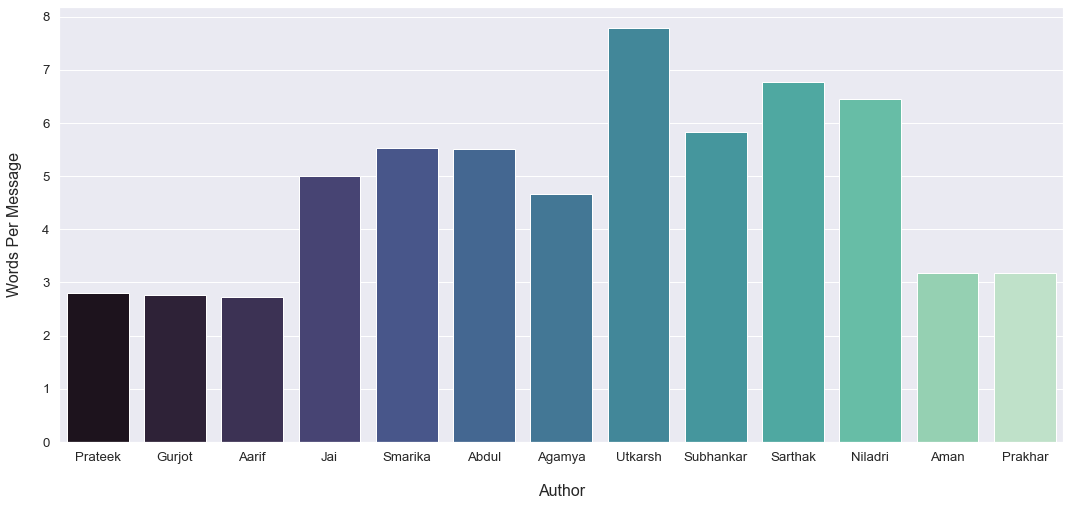

In [22]:
# bar plot -- author vs words per msg
fig, ax = plt.subplots(figsize=(18,8))
sns.set(font_scale=1.2)
sns.barplot(ax=ax ,x= df_data['author'],y=df_data['words_per_msg'], palette='mako')
plt.xlabel('Author', fontsize=16, labelpad=20)
plt.ylabel('Words Per Message', fontsize=16, labelpad=20)
plt.savefig('images/plots/authorVSwordsPerMsg.jpg')

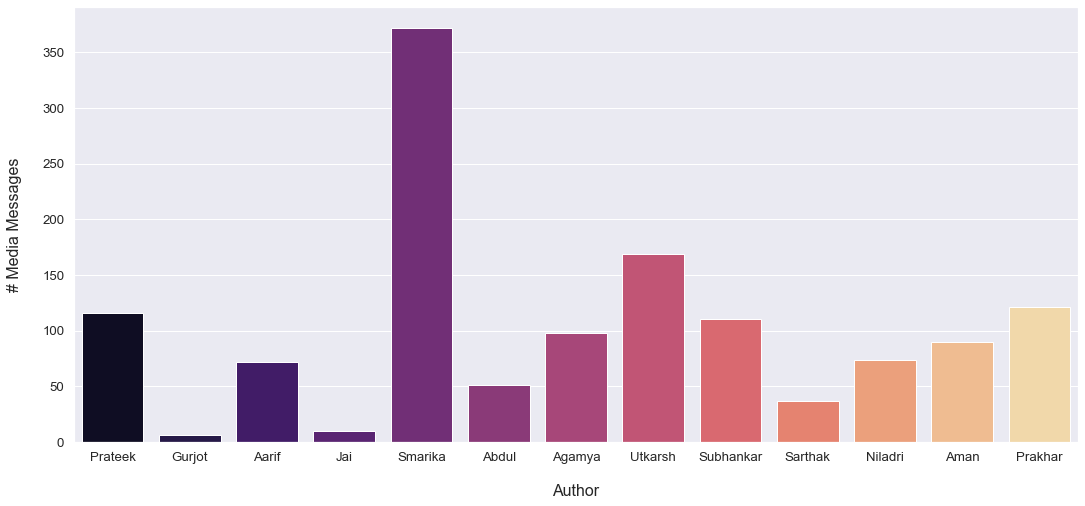

In [23]:
# bar plot -- author vs media msg
fig, ax = plt.subplots(figsize=(18,8))
sns.set(font_scale=1.2)
sns.barplot(ax=ax ,x= df_data['author'],y=df_data['media_msg'], palette='magma')
plt.xlabel('Author', fontsize=16, labelpad=20)
plt.ylabel('# Media Messages', fontsize=16, labelpad=20)
plt.savefig('images/plots/authorVSmediaMsg.jpg')

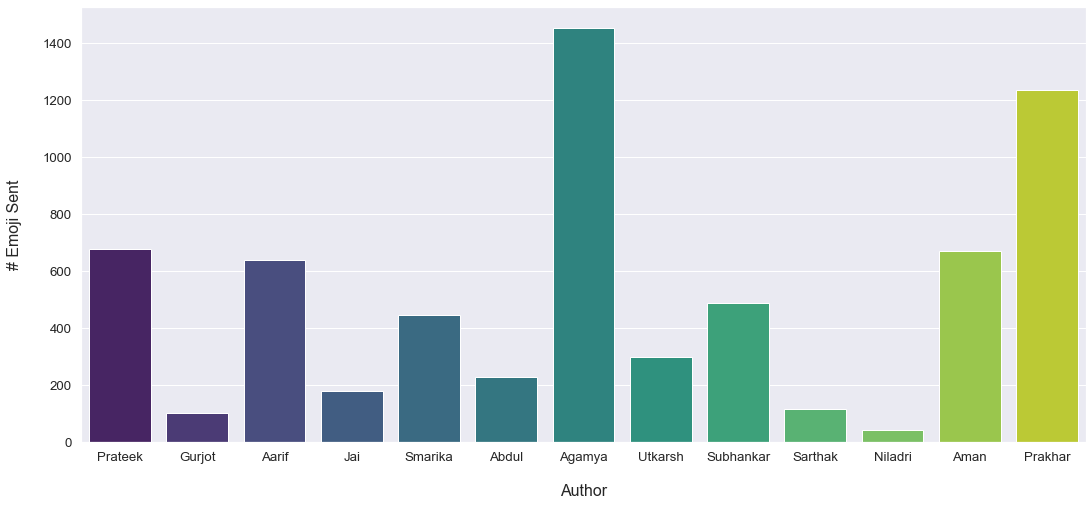

In [24]:
# bar plot -- author vs emoji sent
fig, ax = plt.subplots(figsize=(18,8))
sns.set(font_scale=1.2)
sns.barplot(ax=ax ,x= df_data['author'],y=df_data['emoji_sent'], palette='viridis')
plt.xlabel('Author', fontsize=16, labelpad=20)
plt.ylabel('# Emoji Sent', fontsize=16, labelpad=20)
plt.savefig('images/plots/authorVSemojiSent.jpg')

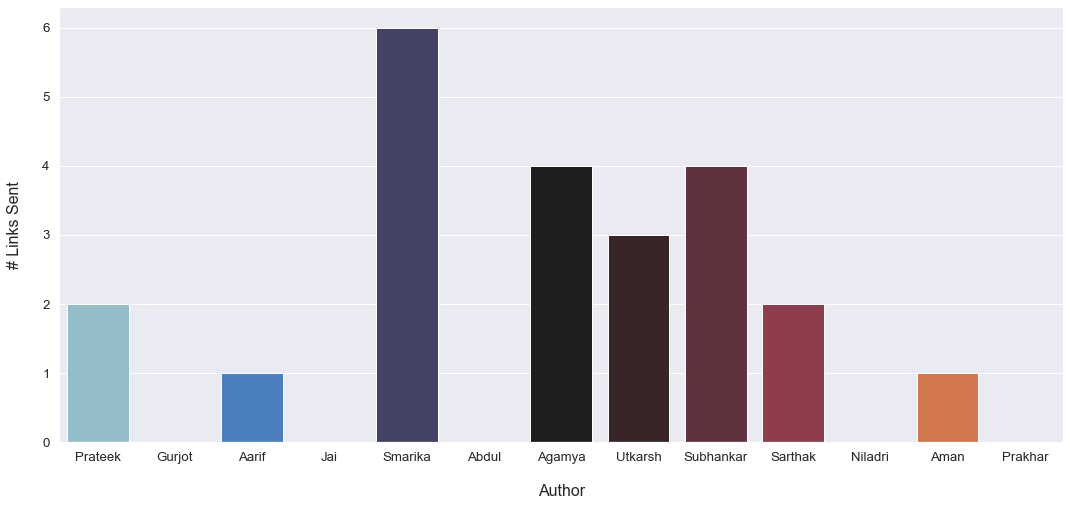

In [25]:
# bar plot -- author vs links sent
fig, ax = plt.subplots(figsize=(18,8))
sns.set(font_scale=1.2)
sns.barplot(ax=ax ,x= df_data['author'],y=df_data['links_sent'], palette='icefire')
plt.xlabel('Author', fontsize=16, labelpad=20)
plt.ylabel('# Links Sent', fontsize=16, labelpad=20)
plt.savefig('images/plots/authorVSlinksSent.jpg')

/Users/niladrihere/.env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/niladrihere/.env/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


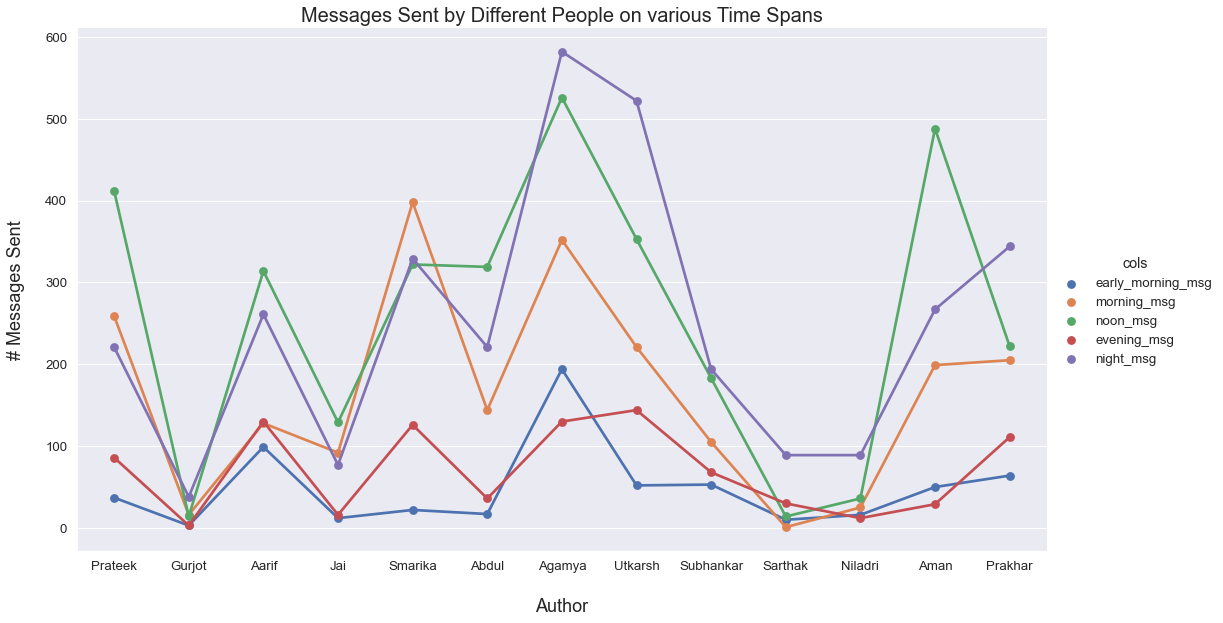

In [26]:
#Messages Sent by Different People on various Time Spans

df_comp = df_data.iloc[:, np.r_[0,6:11]]
df_comp = df_comp.melt('author', var_name='cols',  value_name='vals')
sns.set(font_scale=1.2)
sns.factorplot(x="author", y="vals", hue='cols', data=df_comp, size=8, aspect=1.8)
plt.xlabel('Author', fontsize=18, labelpad=25)
plt.ylabel('# Messages Sent', fontsize=18, labelpad=20)
plt.title('Messages Sent by Different People on various Time Spans', fontsize=20)
plt.savefig('images/plots/authorVSmsgSentByTime.jpg')

/Users/niladrihere/.env/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/niladrihere/.env/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


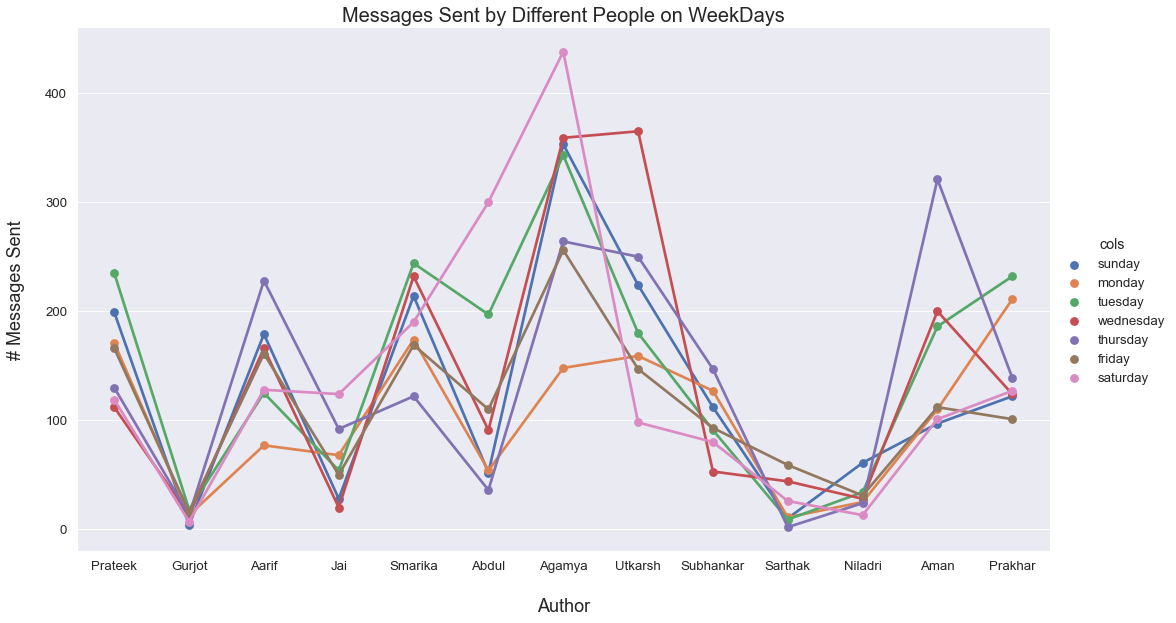

In [27]:
# Messages Sent by Different People on WeekDays

df_week = df_data.iloc[:, np.r_[0,11:18]]
df_week = df_week.melt('author', var_name='cols',  value_name='vals')
sns.set(font_scale=1.2)
sns.factorplot(x="author", y="vals", hue='cols', data=df_week, size=8, aspect=1.8)
plt.xlabel('Author', fontsize=18, labelpad=25)
plt.ylabel('# Messages Sent', fontsize=18, labelpad=20)
plt.title('Messages Sent by Different People on WeekDays', fontsize=20)
plt.savefig('images/plots/authorVSmsgSentByWeekDay.jpg')